In [90]:
import matplotlib.pyplot as plt
%matplotlib inline


import pandas as pd
import numpy as np
from scipy import stats, integrate
from scipy.optimize import minimize_scalar
from matplotlib import pyplot as plt
import itertools #스피어만 상관계수


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [34]:
# 한글 문제
# matplotlit의 기본 폰트에서 한글 지원되지 않기 때문에
# matplotlib의 폰트 변경 필요
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [35]:
df=pd.read_csv("당기순익_merge.csv",index_col='결산년도',encoding='euc-kr')

In [36]:
df

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,현대 모비스,현대차
결산년도,,,,,,,,,,,,
16년09월(3Q),5774.0,1921.0,2974.0,1980.0,3221.0,1446.0,0.0,45379.0,183.0,29382.0,7058.0,11188.0
16년12월(4Q),4631.0,671.0,2700.0,1828.0,4747.0,2583.0,-570.0,70880.0,221.0,2795.0,6974.0,10688.0
17년03월(1Q),8876.0,1805.0,5481.0,2109.0,5835.0,1876.0,-331.0,76844.0,230.0,9000.0,7619.0,14057.0
17년06월(2Q),10047.0,1682.0,5903.0,1714.0,6205.0,1097.0,-221.0,110539.0,176.0,3589.0,4822.0,9136.0
17년09월(3Q),8974.0,1876.0,5455.0,2158.0,7930.0,1314.0,-317.0,111934.0,303.0,15292.0,4822.0,9392.0
17년12월(4Q),5537.0,820.0,3381.0,1720.0,6606.0,524.0,-101.0,122551.0,330.0,-13468.0,-1686.0,12879.0
18년03월(1Q),9684.0,1964.0,5527.0,1538.0,6934.0,3759.0,-467.0,116885.0,315.0,-2505.0,4659.0,7316.0
18년06월(2Q),9468.0,1874.0,4934.0,2818.0,9143.0,3321.0,-195.0,110434.0,321.0,-9186.0,5529.0,8107.0
18년09월(3Q),9540.0,2072.0,3466.0,684.0,10498.0,2357.0,-270.0,131507.0,372.0,7373.0,4496.0,3060.0


In [37]:
list1=df.columns
list1

Index(['KB 금융', 'LG 생활건강', 'LG 화학', 'NAVER', 'SK 텔레콤', '삼성물산', '삼성바이오로직스',
       '삼성전자', '포스코 케미칼', '한국전력', '현대 모비스', '현대차'],
      dtype='object')

In [38]:
df['합']=[0 for i in range(len(df.index))]
for i in df.columns:
    df['합']=df['합']+df[i]
df

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,현대 모비스,현대차,합
결산년도,,,,,,,,,,,,,
16년09월(3Q),5774.0,1921.0,2974.0,1980.0,3221.0,1446.0,0.0,45379.0,183.0,29382.0,7058.0,11188.0,221012.0
16년12월(4Q),4631.0,671.0,2700.0,1828.0,4747.0,2583.0,-570.0,70880.0,221.0,2795.0,6974.0,10688.0,216296.0
17년03월(1Q),8876.0,1805.0,5481.0,2109.0,5835.0,1876.0,-331.0,76844.0,230.0,9000.0,7619.0,14057.0,266802.0
17년06월(2Q),10047.0,1682.0,5903.0,1714.0,6205.0,1097.0,-221.0,110539.0,176.0,3589.0,4822.0,9136.0,309378.0
17년09월(3Q),8974.0,1876.0,5455.0,2158.0,7930.0,1314.0,-317.0,111934.0,303.0,15292.0,4822.0,9392.0,338266.0
17년12월(4Q),5537.0,820.0,3381.0,1720.0,6606.0,524.0,-101.0,122551.0,330.0,-13468.0,-1686.0,12879.0,278186.0
18년03월(1Q),9684.0,1964.0,5527.0,1538.0,6934.0,3759.0,-467.0,116885.0,315.0,-2505.0,4659.0,7316.0,311218.0
18년06월(2Q),9468.0,1874.0,4934.0,2818.0,9143.0,3321.0,-195.0,110434.0,321.0,-9186.0,5529.0,8107.0,293136.0
18년09월(3Q),9540.0,2072.0,3466.0,684.0,10498.0,2357.0,-270.0,131507.0,372.0,7373.0,4496.0,3060.0,350310.0


In [39]:
for n in range(len(list1)):
    df[list1[n]+'증가율']=[0 for i in range(len(df.index))]
    for i in range(1,len(df.index)):
        if df.iloc[i-1,n] == 0.0:
            pass
        else :
            df.iloc[i,n+13]=(df.iloc[i,n]-df.iloc[i-1,n])/abs(df.iloc[i-1,n])*100
df

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,...,LG 화학증가율,NAVER증가율,SK 텔레콤증가율,삼성물산증가율,삼성바이오로직스증가율,삼성전자증가율,포스코 케미칼증가율,한국전력증가율,현대 모비스증가율,현대차증가율
결산년도,,,,,,,,,,,,,,,,,,,,,
16년09월(3Q),5774.0,1921.0,2974.0,1980.0,3221.0,1446.0,0.0,45379.0,183.0,29382.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16년12월(4Q),4631.0,671.0,2700.0,1828.0,4747.0,2583.0,-570.0,70880.0,221.0,2795.0,...,-9.213181,-7.676768,47.376591,78.630705,0.000000,56.195597,20.765027,-90.487373,-1.190139,-4.469074
17년03월(1Q),8876.0,1805.0,5481.0,2109.0,5835.0,1876.0,-331.0,76844.0,230.0,9000.0,...,103.000000,15.371991,22.919739,-27.371274,41.929825,8.414221,4.072398,222.003578,9.248638,31.521332
17년06월(2Q),10047.0,1682.0,5903.0,1714.0,6205.0,1097.0,-221.0,110539.0,176.0,3589.0,...,7.699325,-18.729256,6.341045,-41.524520,33.232628,43.848576,-23.478261,-60.122222,-36.710854,-35.007470
17년09월(3Q),8974.0,1876.0,5455.0,2158.0,7930.0,1314.0,-317.0,111934.0,303.0,15292.0,...,-7.589361,25.904317,27.800161,19.781222,-43.438914,1.261998,72.159091,326.079688,0.000000,2.802102
17년12월(4Q),5537.0,820.0,3381.0,1720.0,6606.0,524.0,-101.0,122551.0,330.0,-13468.0,...,-38.020165,-20.296571,-16.696091,-60.121766,68.138801,9.485054,8.910891,-188.072195,-134.964745,37.127342
18년03월(1Q),9684.0,1964.0,5527.0,1538.0,6934.0,3759.0,-467.0,116885.0,315.0,-2505.0,...,63.472345,-10.581395,4.965183,617.366412,-362.376238,-4.623381,-4.545455,81.400356,376.334520,-43.194347
18년06월(2Q),9468.0,1874.0,4934.0,2818.0,9143.0,3321.0,-195.0,110434.0,321.0,-9186.0,...,-10.729148,83.224967,31.857514,-11.652035,58.244111,-5.519100,1.904762,-266.706587,18.673535,10.811919
18년09월(3Q),9540.0,2072.0,3466.0,684.0,10498.0,2357.0,-270.0,131507.0,372.0,7373.0,...,-29.752736,-75.727466,14.820081,-29.027401,-38.461538,19.081986,15.887850,180.263444,-18.683306,-62.254841


In [40]:
df_rate = df.iloc[:,13:]

In [41]:
df_rate

,KB 금융증가율,LG 생활건강증가율,LG 화학증가율,NAVER증가율,SK 텔레콤증가율,삼성물산증가율,삼성바이오로직스증가율,삼성전자증가율,포스코 케미칼증가율,한국전력증가율,현대 모비스증가율,현대차증가율
결산년도,,,,,,,,,,,,
16년09월(3Q),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
16년12월(4Q),-19.795636,-65.070276,-9.213181,-7.676768,47.376591,78.630705,0.000000,56.195597,20.765027,-90.487373,-1.190139,-4.469074
17년03월(1Q),91.664867,169.001490,103.000000,15.371991,22.919739,-27.371274,41.929825,8.414221,4.072398,222.003578,9.248638,31.521332
17년06월(2Q),13.192880,-6.814404,7.699325,-18.729256,6.341045,-41.524520,33.232628,43.848576,-23.478261,-60.122222,-36.710854,-35.007470
17년09월(3Q),-10.679805,11.533888,-7.589361,25.904317,27.800161,19.781222,-43.438914,1.261998,72.159091,326.079688,0.000000,2.802102
17년12월(4Q),-38.299532,-56.289979,-38.020165,-20.296571,-16.696091,-60.121766,68.138801,9.485054,8.910891,-188.072195,-134.964745,37.127342
18년03월(1Q),74.896153,139.512195,63.472345,-10.581395,4.965183,617.366412,-362.376238,-4.623381,-4.545455,81.400356,376.334520,-43.194347
18년06월(2Q),-2.230483,-4.582485,-10.729148,83.224967,31.857514,-11.652035,58.244111,-5.519100,1.904762,-266.706587,18.673535,10.811919
18년09월(3Q),0.760456,10.565635,-29.752736,-75.727466,14.820081,-29.027401,-38.461538,19.081986,15.887850,180.263444,-18.683306,-62.254841


In [42]:
x_lab = df_rate.index
x_lab


Index(['16년09월(3Q)', '16년12월(4Q)', '17년03월(1Q)', '17년06월(2Q)', '17년09월(3Q)',
       '17년12월(4Q)', '18년03월(1Q)', '18년06월(2Q)', '18년09월(3Q)', '18년12월(4Q)',
       '19년03월(1Q)', '19년06월(2Q)', '19년09월(3Q)', '19년12월(4Q)', '20년03월(1Q)',
       '20년06월(2Q)', '20년09월(3Q)', '20년12월(4Q)', '21년03월(1Q)'],
      dtype='object', name='결산년도')

In [43]:
xtick = ['16-3','16-4','17-1','17-2','17-3','17-4','18-1','18-2','18-3','18-4','19-1','19-2','19-3','19-4','20-1','20-2','20-3','20-4','21-1']


In [44]:
y_lab = df_rate['KB 금융증가율']
y_lab


결산년도
16년09월(3Q)      0.000000
16년12월(4Q)    -19.795636
17년03월(1Q)     91.664867
17년06월(2Q)     13.192880
17년09월(3Q)    -10.679805
17년12월(4Q)    -38.299532
18년03월(1Q)     74.896153
18년06월(2Q)     -2.230483
18년09월(3Q)      0.760456
18년12월(4Q)    -79.790356
19년03월(1Q)    338.744813
19년06월(2Q)     17.212436
19년09월(3Q)     -5.123550
19년12월(4Q)    -43.116828
20년03월(1Q)     38.086339
20년06월(2Q)     34.321288
20년09월(3Q)     20.322418
20년12월(4Q)    -51.716630
21년03월(1Q)    122.892820
Name: KB 금융증가율, dtype: float64

<Figure size 1440x720 with 0 Axes>

Text(0.5, 0, '분기')

Text(0, 0.5, '성장률(%)')

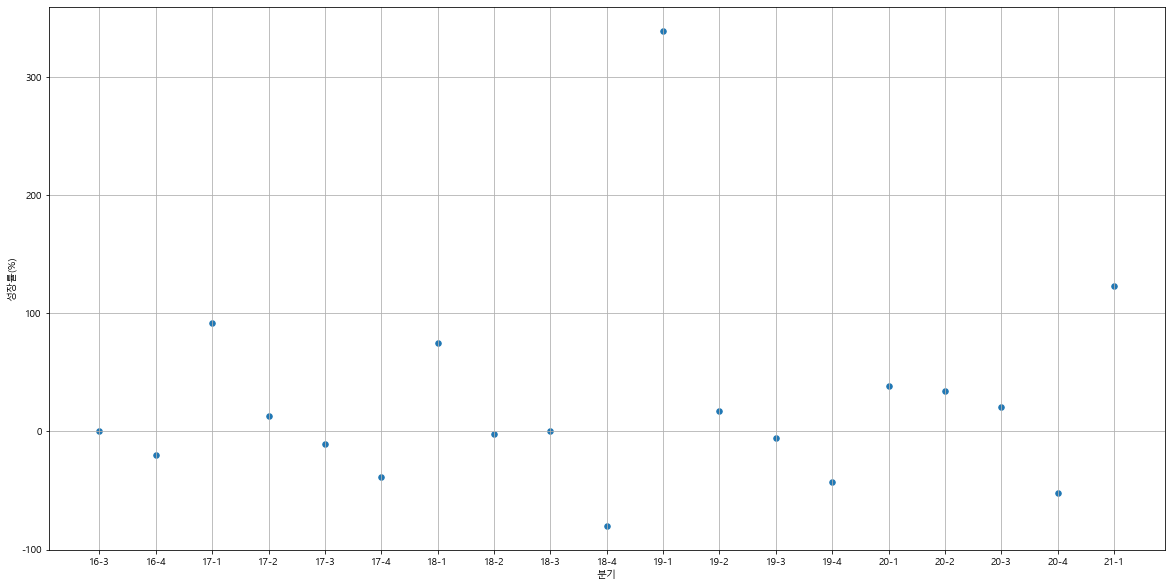

In [45]:


plt.figure(figsize=(20,10))
plt.scatter(xtick, y_lab, s=30)

plt.xlabel('분기')
plt.ylabel('성장률(%)')

plt.grid()
plt.show()


<Figure size 936x1440 with 0 Axes>

Text(0.5, 0, '분기')

Text(0, 0.5, '성장률(%)')

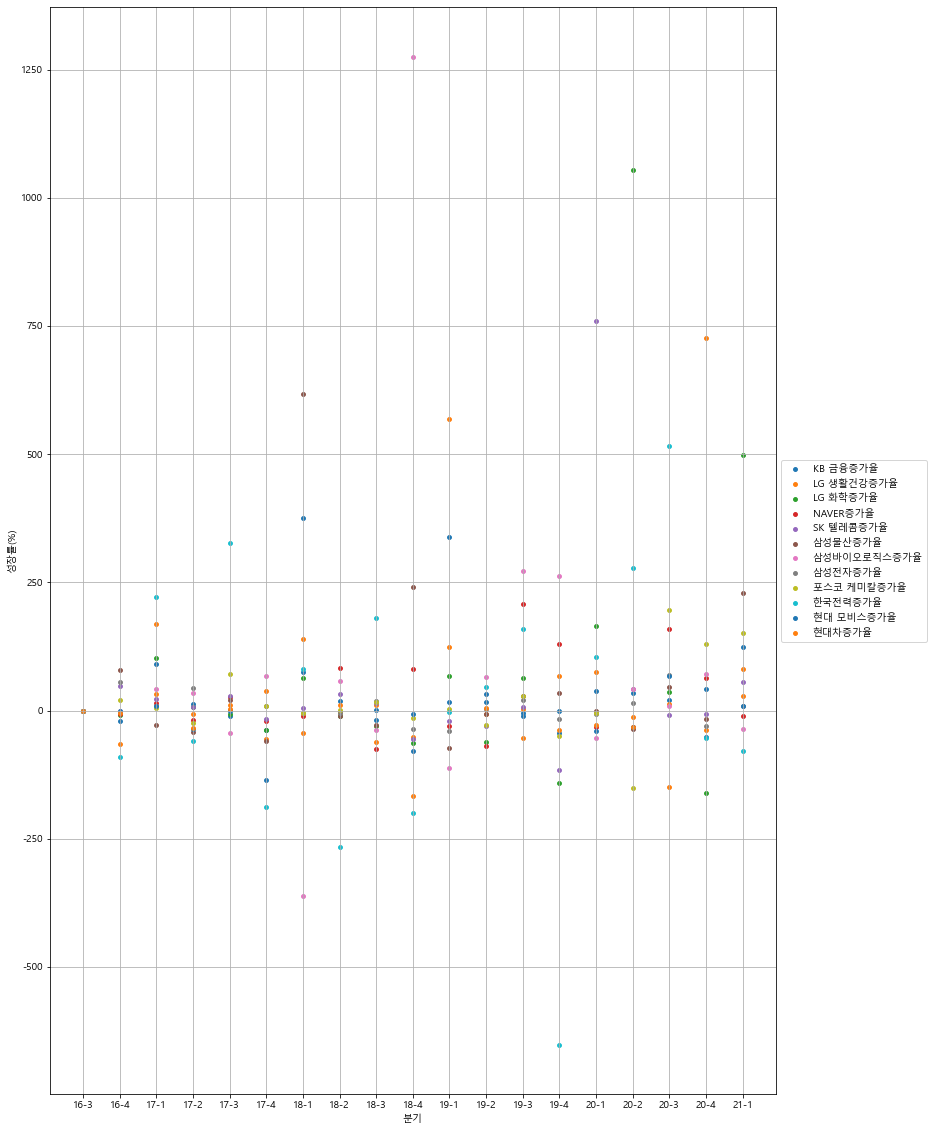

In [66]:
xtick = ['16-3','16-4','17-1','17-2','17-3','17-4','18-1','18-2','18-3','18-4','19-1','19-2','19-3','19-4','20-1','20-2','20-3','20-4','21-1']
plt.figure(figsize=(13,20))

for i in range(len(df_rate.columns)) : 

    ytick = df_rate.iloc[:,i]
    plt.scatter(xtick, ytick, s=15, label=df_rate.columns[i])
    # plt.plot(xtick, ytick, marker='*', label=df_rate.columns[i])

plt.xlabel('분기')
plt.ylabel('성장률(%)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()
plt.savefig('분기별 생산률linegraph.png')
plt.show()


In [47]:
df_rate.index


Index(['16년09월(3Q)', '16년12월(4Q)', '17년03월(1Q)', '17년06월(2Q)', '17년09월(3Q)',
       '17년12월(4Q)', '18년03월(1Q)', '18년06월(2Q)', '18년09월(3Q)', '18년12월(4Q)',
       '19년03월(1Q)', '19년06월(2Q)', '19년09월(3Q)', '19년12월(4Q)', '20년03월(1Q)',
       '20년06월(2Q)', '20년09월(3Q)', '20년12월(4Q)', '21년03월(1Q)'],
      dtype='object', name='결산년도')

In [48]:
highrate = {}

In [49]:
quater = df_rate.loc['16년12월(4Q)']
highrate = quater.sort_values(ascending=False)
highrate
highrate[0:3]
highrate.index[0:3]
lis0 = [highrate.index[0],highrate[0]]
lis0
lis1 = [highrate.index[1],highrate[1]]
lis1
lis2 = [highrate.index[2],highrate[2]]
lis2
highdict = {'16년12월(4Q)':[lis0,lis1,lis2]}
highdict

삼성물산증가율        78.630705
삼성전자증가율        56.195597
SK 텔레콤증가율      47.376591
포스코 케미칼증가율     20.765027
삼성바이오로직스증가율     0.000000
현대 모비스증가율      -1.190139
현대차증가율         -4.469074
NAVER증가율       -7.676768
LG 화학증가율       -9.213181
KB 금융증가율      -19.795636
LG 생활건강증가율    -65.070276
한국전력증가율       -90.487373
Name: 16년12월(4Q), dtype: float64

삼성물산증가율      78.630705
삼성전자증가율      56.195597
SK 텔레콤증가율    47.376591
Name: 16년12월(4Q), dtype: float64

Index(['삼성물산증가율', '삼성전자증가율', 'SK 텔레콤증가율'], dtype='object')

['삼성물산증가율', 78.63070539419087]

['삼성전자증가율', 56.195597082350865]

['SK 텔레콤증가율', 47.376591120769945]

{'16년12월(4Q)': [['삼성물산증가율', 78.63070539419087],
  ['삼성전자증가율', 56.195597082350865],
  ['SK 텔레콤증가율', 47.376591120769945]]}

In [50]:
dic_highest3 = {}

for q in df_rate.index :
    quater = df_rate.loc[q]
    highrate = quater.sort_values(ascending=False)
    #highrate[0:3]
    dic_highest3[q] = [[highrate.index[0].replace('증가율',''),round(highrate[0],3)],
                       [highrate.index[1].replace('증가율',''),round(highrate[1],3)],
                       [highrate.index[2].replace('증가율',''),round(highrate[2],3)]]

    #dic_highest3.append(q,)

In [51]:
dic_highest3

{'16년09월(3Q)': [['KB 금융', 0.0], ['LG 생활건강', 0.0], ['LG 화학', 0.0]],
 '16년12월(4Q)': [['삼성물산', 78.631], ['삼성전자', 56.196], ['SK 텔레콤', 47.377]],
 '17년03월(1Q)': [['한국전력', 222.004], ['LG 생활건강', 169.001], ['LG 화학', 103.0]],
 '17년06월(2Q)': [['삼성전자', 43.849], ['삼성바이오로직스', 33.233], ['KB 금융', 13.193]],
 '17년09월(3Q)': [['한국전력', 326.08], ['포스코 케미칼', 72.159], ['SK 텔레콤', 27.8]],
 '17년12월(4Q)': [['삼성바이오로직스', 68.139], ['현대차', 37.127], ['삼성전자', 9.485]],
 '18년03월(1Q)': [['삼성물산', 617.366], ['현대 모비스', 376.335], ['LG 생활건강', 139.512]],
 '18년06월(2Q)': [['NAVER', 83.225], ['삼성바이오로직스', 58.244], ['SK 텔레콤', 31.858]],
 '18년09월(3Q)': [['한국전력', 180.263], ['삼성전자', 19.082], ['포스코 케미칼', 15.888]],
 '18년12월(4Q)': [['삼성바이오로직스', 1275.185], ['삼성물산', 241.366], ['NAVER', 81.287]],
 '19년03월(1Q)': [['현대차', 569.159], ['KB 금융', 338.745], ['LG 생활건강', 122.902]],
 '19년06월(2Q)': [['삼성바이오로직스', 66.304], ['한국전력', 45.849], ['현대 모비스', 32.688]],
 '19년09월(3Q)': [['삼성바이오로직스', 272.581], ['NAVER', 206.835], ['한국전력', 158.491]],
 '19년12월(4Q)': [[

In [52]:
list1

Index(['KB 금융', 'LG 생활건강', 'LG 화학', 'NAVER', 'SK 텔레콤', '삼성물산', '삼성바이오로직스',
       '삼성전자', '포스코 케미칼', '한국전력', '현대 모비스', '현대차'],
      dtype='object')

In [53]:
pearsonr(df['합'],df['KB 금융']) 

(0.38867558354066517, 0.10005452859240302)

In [54]:
pearsonr(df['합'],df['LG 생활건강']) 

(0.05302718145177489, 0.8293001642405576)

In [55]:
pearsonr(df['합'],df['LG 화학']) 

(0.6015868564116968, 0.006433329585522411)

In [56]:
pearsonr(df['합'],df['NAVER']) 

(0.27772626560397357, 0.24964089304268466)

In [57]:
pearsonr(df['합'],df['SK 텔레콤']) 

(0.8729196549527926, 1.0802937498809508e-06)

In [58]:
pearsonr(df['합'],df['삼성물산']) 

(-0.07387011285377579, 0.7637627910729606)

In [59]:
pearsonr(df['합'],df['삼성바이오로직스']) 

(-0.3238432256168653, 0.17619795673623606)

In [60]:
pearsonr(df['합'],df['삼성전자']) 

(0.8835392680101589, 5.341869557630313e-07)

In [61]:
pearsonr(df['합'],df['포스코 케미칼']) 

(0.41747172717001707, 0.07533538182803122)

In [62]:
pearsonr(df['합'],df['한국전력']) 

(0.2993774230310061, 0.21307077666356422)

In [63]:
pearsonr(df['합'],df['현대 모비스']) 

(-0.10539809914667238, 0.6676105458005123)

In [64]:
pearsonr(df['합'],df['현대차']) 

(0.07934180358715581, 0.7467911298562769)

In [68]:
df=pd.read_csv("당기순익_merge.csv",index_col='결산년도',encoding='euc-kr')
df

,KB 금융,LG 생활건강,LG 화학,NAVER,SK 텔레콤,삼성물산,삼성바이오로직스,삼성전자,포스코 케미칼,한국전력,현대 모비스,현대차
결산년도,,,,,,,,,,,,
16년09월(3Q),5774.0,1921.0,2974.0,1980.0,3221.0,1446.0,0.0,45379.0,183.0,29382.0,7058.0,11188.0
16년12월(4Q),4631.0,671.0,2700.0,1828.0,4747.0,2583.0,-570.0,70880.0,221.0,2795.0,6974.0,10688.0
17년03월(1Q),8876.0,1805.0,5481.0,2109.0,5835.0,1876.0,-331.0,76844.0,230.0,9000.0,7619.0,14057.0
17년06월(2Q),10047.0,1682.0,5903.0,1714.0,6205.0,1097.0,-221.0,110539.0,176.0,3589.0,4822.0,9136.0
17년09월(3Q),8974.0,1876.0,5455.0,2158.0,7930.0,1314.0,-317.0,111934.0,303.0,15292.0,4822.0,9392.0
17년12월(4Q),5537.0,820.0,3381.0,1720.0,6606.0,524.0,-101.0,122551.0,330.0,-13468.0,-1686.0,12879.0
18년03월(1Q),9684.0,1964.0,5527.0,1538.0,6934.0,3759.0,-467.0,116885.0,315.0,-2505.0,4659.0,7316.0
18년06월(2Q),9468.0,1874.0,4934.0,2818.0,9143.0,3321.0,-195.0,110434.0,321.0,-9186.0,5529.0,8107.0
18년09월(3Q),9540.0,2072.0,3466.0,684.0,10498.0,2357.0,-270.0,131507.0,372.0,7373.0,4496.0,3060.0


In [69]:
list1=df.columns
list1


Index(['KB 금융', 'LG 생활건강', 'LG 화학', 'NAVER', 'SK 텔레콤', '삼성물산', '삼성바이오로직스',
       '삼성전자', '포스코 케미칼', '한국전력', '현대 모비스', '현대차'],
      dtype='object')

In [110]:
df['KB 금융']



결산년도
16년09월(3Q)     5774.0
16년12월(4Q)     4631.0
17년03월(1Q)     8876.0
17년06월(2Q)    10047.0
17년09월(3Q)     8974.0
17년12월(4Q)     5537.0
18년03월(1Q)     9684.0
18년06월(2Q)     9468.0
18년09월(3Q)     9540.0
18년12월(4Q)     1928.0
19년03월(1Q)     8459.0
19년06월(2Q)     9915.0
19년09월(3Q)     9407.0
19년12월(4Q)     5351.0
20년03월(1Q)     7389.0
20년06월(2Q)     9925.0
20년09월(3Q)    11942.0
20년12월(4Q)     5766.0
21년03월(1Q)    12852.0
Name: KB 금융, dtype: float64

In [116]:
df.index

Index(['16년09월(3Q)', '16년12월(4Q)', '17년03월(1Q)', '17년06월(2Q)', '17년09월(3Q)',
       '17년12월(4Q)', '18년03월(1Q)', '18년06월(2Q)', '18년09월(3Q)', '18년12월(4Q)',
       '19년03월(1Q)', '19년06월(2Q)', '19년09월(3Q)', '19년12월(4Q)', '20년03월(1Q)',
       '20년06월(2Q)', '20년09월(3Q)', '20년12월(4Q)', '21년03월(1Q)'],
      dtype='object', name='결산년도')

In [98]:
num_mean = np.mean(df['KB 금융'])
num_mean

num_std = np.std(df['KB 금융'])
num_std

8182.368421052632

2644.7898177464695

In [120]:
data = pd.DataFrame(index=df.index)

In [124]:
bigZ = 0
Zlist = []
index = ''
num_mean = np.mean(df['KB 금융'])
num_std = np.std(df['KB 금융'])
for i in range(len(df.index)) : 
    X = df['KB 금융'][i]
    Z = (X - num_mean) / num_std
    Zlist.append(Z)
    if Z > bigZ : 
        bigZ = Z
        index = df['KB 금융'].index[i]
data['KB 금융' + 'Z값'] = Zlist

In [125]:
data

,KB 금융Z값
결산년도,
16년09월(3Q),-0.910609
16년12월(4Q),-1.342779
17년03월(1Q),0.262263
17년06월(2Q),0.705021
17년09월(3Q),0.299317
17년12월(4Q),-1.000219
18년03월(1Q),0.567770
18년06월(2Q),0.486100
18년09월(3Q),0.513323


In [119]:
data = pd.DataFrame(index=df.index)


""
결산년도
16년09월(3Q)
16년12월(4Q)
17년03월(1Q)
17년06월(2Q)
17년09월(3Q)
17년12월(4Q)
18년03월(1Q)
18년06월(2Q)
18년09월(3Q)


In [127]:
data = pd.DataFrame(index=df.index)
highestZdic = {}

for n in list1 :
    index = ''
    bigZ = 0
    bigZlis = ['',0]
    Zlis = []
    num_mean = np.mean(df[n])
    num_std = np.std(df[n])
    for i in range(len(df.index)) :
        X = df[n][i]
        Z = (X - num_mean) / num_std
        Zlis.append(Z)
        if Z > bigZ : 
            bigZ = Z
            index = df[n].index[i]

    bigZlis = [index,bigZ]
    
    highestZdic[n] = bigZlis
    
    data[n + 'Z값'] = Zlis

print(highestZdic)
data

{'KB 금융': ['21년03월(1Q)', 1.765596474855682], 'LG 생활건강': ['21년03월(1Q)', 1.5203108310505373], 'LG 화학': ['21년03월(1Q)', 2.9966448531994176], 'NAVER': ['20년12월(4Q)', 2.328733865879468], 'SK 텔레콤': ['18년09월(3Q)', 2.204917168436891], '삼성물산': ['21년03월(1Q)', 2.847285470795851], '삼성바이오로직스': ['18년12월(4Q)', 3.5854631460285717], '삼성전자': ['18년09월(3Q)', 1.8208810205763994], '포스코 케미칼': ['21년03월(1Q)', 1.4345464704137008], '한국전력': ['16년09월(3Q)', 2.7061031020591844], '현대 모비스': ['17년03월(1Q)', 1.368356910749315], '현대차': ['21년03월(1Q)', 1.570269883533919]}


,KB 금융Z값,LG 생활건강Z값,LG 화학Z값,NAVERZ값,SK 텔레콤Z값,삼성물산Z값,삼성바이오로직스Z값,삼성전자Z값,포스코 케미칼Z값,한국전력Z값,현대 모비스Z값,현대차Z값
결산년도,,,,,,,,,,,,
16년09월(3Q),-0.910609,0.224883,-0.136326,0.237277,-0.718992,-0.763071,-0.269799,-1.269586,-0.465623,2.706103,1.088005,0.705048
16년12월(4Q),-1.342779,-2.202831,-0.216284,0.066454,-0.105843,-0.209914,-0.962361,-0.354553,-0.129779,0.097033,1.046027,0.597807
17년03월(1Q),0.262263,-0.000409,0.595265,0.382252,0.331317,-0.553874,-0.671971,-0.140551,-0.050237,0.705950,1.368357,1.320398
17년06월(2Q),0.705021,-0.239296,0.718413,-0.061663,0.479984,-0.932861,-0.538318,1.068502,-0.527489,0.174951,-0.029406,0.264931
17년09월(3Q),0.299317,0.137485,0.587678,0.437320,1.173091,-0.827290,-0.654960,1.118558,0.594937,1.323405,-0.029406,0.319838
17년12월(4Q),-1.000219,-1.913447,-0.017555,-0.054920,0.641106,-1.211629,-0.392516,1.499520,0.833563,-1.498909,-3.281689,1.067738
18년03월(1Q),0.567770,0.308396,0.608689,-0.259458,0.772897,0.362216,-0.837213,1.296211,0.700993,-0.423073,-0.110863,-0.125427
18년06월(2Q),0.486100,0.133601,0.435640,1.179051,1.660476,0.149127,-0.506728,1.064734,0.754021,-1.078702,0.323908,0.044229
18년09월(3Q),0.513323,0.518151,0.007249,-1.219213,2.204917,-0.319864,-0.597854,1.820881,1.204759,0.546287,-0.192320,-1.038264


In [ ]:
dic_highest3 = {}

for q in data.index :
    quater = data.loc[q]
    highrate = quater.sort_values(ascending=False)
    #highrate[0:3]
    dic_highest3[q] = [[highrate.index[0].replace('증가율',''),round(highrate[0],3)],
                       [highrate.index[1].replace('증가율',''),round(highrate[1],3)],
                       [highrate.index[2].replace('증가율',''),round(highrate[2],3)]]

    #dic_highest3.append(q,)